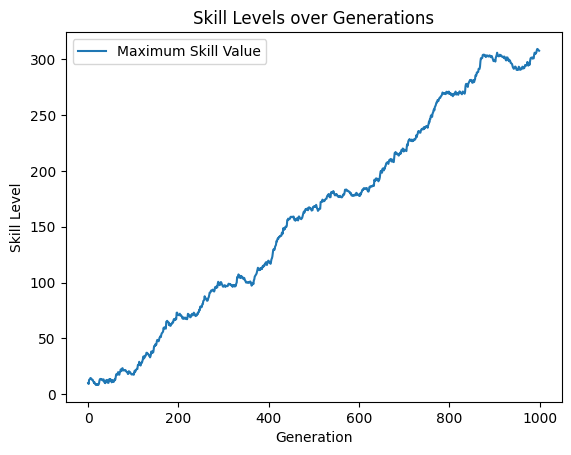

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the parameters for the distribution
num_agents = 40  # Number of agents in the population
num_generations = 1000  # Number of generations

# Generate the initial skills for the first generation
skills = np.random.uniform(low=0, high=10, size=num_agents)

# Track the maximum skill value for each generation
max_skills = []

# Perform the copying process for each generation
for generation in range(num_generations):
    # Determine the target for the Gumbel distribution in this generation
    target = max(skills)
    
    max_skills.append(target)  # Track the maximum skill value

    # Generate a random value from the Gumbel distribution
    # The Gumbel distribution is characterized by two parameters: loc (location) and scale. 
    # The loc parameter sets the location or position of the distribution's mode, while the scale parameter controls the spread or dispersion of the distribution.

    skills = np.random.gumbel(loc=target-4, scale=1, size=num_agents)
        
    

# Plot the skill levels as a function of generation
plt.plot(range(num_generations), max_skills, label='Maximum Skill Value')
plt.xlabel('Generation')
plt.ylabel('Skill Level')
plt.title('Skill Levels over Generations')
plt.legend()
plt.show()

In [7]:
skills 


array([305.04256825, 307.23945168, 307.33088415, 307.92486576,
       306.54057211, 307.71574733, 306.84715163, 307.19429276,
       306.96545889, 306.68122353, 306.33284703, 306.17135848,
       305.38222697, 305.20729955, 307.7138739 , 305.41454851,
       307.27096509, 305.45508073, 307.95329411, 306.98806949,
       307.62605752, 306.2077119 , 307.24277041, 305.99724125,
       308.15002145, 307.06125247, 308.65395612, 307.9352271 ,
       307.49708365, 307.21002452, 305.46268426, 305.95252407,
       306.58522655, 307.17598061, 308.01856104, 306.06646304,
       307.29534489, 306.58171894, 307.04220008, 305.81110034,
       307.3096302 , 306.96031169, 306.43869585, 305.96774027,
       307.88753302, 306.60352487, 305.83039855, 306.61247375,
       308.34360603, 308.43617978, 307.54143628, 305.94477338,
       305.19602525, 305.48247229, 307.21740274, 305.62253462,
       307.86046758, 305.08596233, 308.20931659, 308.88807538,
       306.87608498, 307.13535681, 307.22678469, 306.34

In [18]:
def henrich_model(N, generations, dispersion, deviance):

    # Generate the initial skills for the first generation
    skills = np.random.uniform(low=0, high=10, size=N)

    # Track the maximum skill value for each generation
    max_skills = []

    # Perform the copying process for each generation
    for generation in range(generations):
        # Determine the target for the Gumbel distribution in this generation
        target = max(skills)
        
        max_skills.append(target)  # Track the maximum skill value

        # Generate a random value from the Gumbel distribution
        # The Gumbel distribution is characterized by two parameters: loc (location) and scale. 
        # The loc parameter sets the location or position of the distribution's mode, while the scale parameter controls the spread or dispersion of the distribution.

        skills = np.random.gumbel(loc=target-deviance, scale=dispersion, size=N)
        #skills = np.random.normal(loc=target-deviance, scale=dispersion, size=N)

    return max_skills

In [19]:
Ns = range(1, 25, 5)
henrich = {}
for N in Ns:
    henrich[N] = henrich_model(N, 100, dispersion = 2, deviance = 2)

henrich

{1: [4.340983035115954,
  2.853356124149902,
  1.071979102579243,
  0.12029223490304686,
  0.9421196153445233,
  -3.6450572839453814,
  -7.004899368551274,
  -6.5140581256757075,
  -9.961472633298191,
  -13.023815365233757,
  -15.902557178520949,
  -18.682668775248292,
  -15.752804639803298,
  -20.910749274854258,
  -23.57251424990887,
  -24.326763847297315,
  -24.055810775998275,
  -26.14300777326369,
  -27.514658610197262,
  -31.70488855900458,
  -31.059658463949475,
  -33.161169847094556,
  -36.69435297039913,
  -35.85637783683252,
  -38.523956666929074,
  -43.57647787257514,
  -41.81054803358252,
  -40.63326882464916,
  -43.19536325183527,
  -45.51163212880312,
  -48.23756468727375,
  -47.1915185216808,
  -44.26910760340894,
  -42.95477613412811,
  -46.20157874013523,
  -49.07435356842821,
  -50.24117646374809,
  -47.40260748644263,
  -47.94507262165388,
  -50.35100339888673,
  -48.719256261892646,
  -46.48452110546256,
  -48.061656023540394,
  -44.60712780664813,
  -47.88763607133

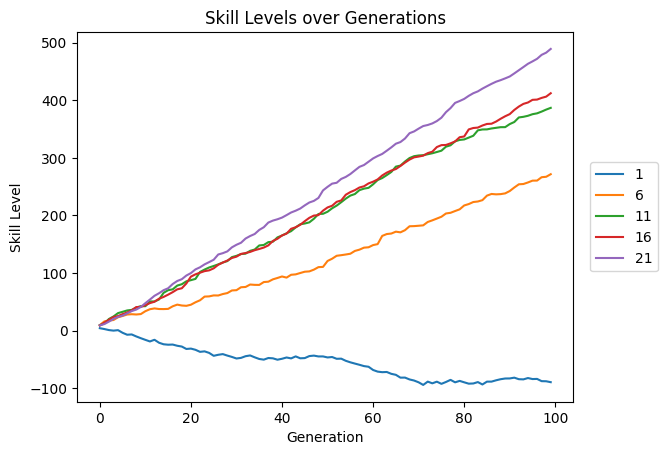

In [20]:
# Plot each list in the dictionary as a line plot
for key, values in henrich.items():
    sns.lineplot(x=range(len(values)), y=values, label=key)

# Set x and y labels
plt.xlabel('Generation')
plt.ylabel('Skill Level')
plt.title('Skill Levels over Generations')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')

# Show the plot
plt.show()

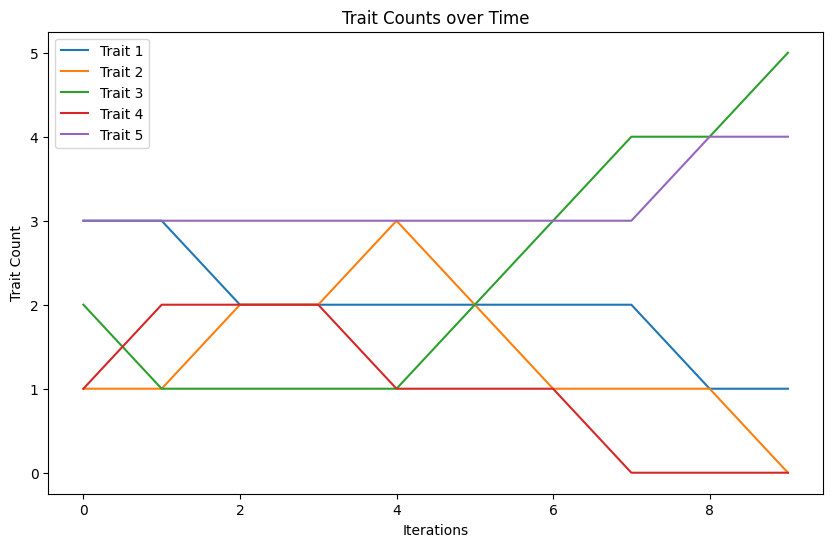

In [194]:
# UNBIASED TRANSMISSION

# Set the parameters
num_agents = 10
num_traits = 5
num_iterations = 10

# Initialize agents with random traits
agents = np.random.randint(num_traits, size=num_agents)

# Track the count of each trait over time
trait_counts = []

for _ in range(num_iterations):
    # Count the frequency of each trait
    counts = np.bincount(agents, minlength=num_traits)

    # Update trait_counts list
    trait_counts.append(counts.copy())

    # Randomly select two agents
    agent1, agent2 = np.random.choice(num_agents, size=2, replace=False)

    # Perform unbiased transmission by copying traits
    agents[agent2] = agents[agent1]

# Convert trait_counts to a numpy array
trait_counts = np.array(trait_counts)

# Plot the trait counts over time
plt.figure(figsize=(10, 6))
for trait in range(num_traits):
    plt.plot(trait_counts[:, trait], label=f'Trait {trait+1}')

plt.xlabel('Iterations')
plt.ylabel('Trait Count')
plt.title('Trait Counts over Time')
plt.legend()
plt.show()


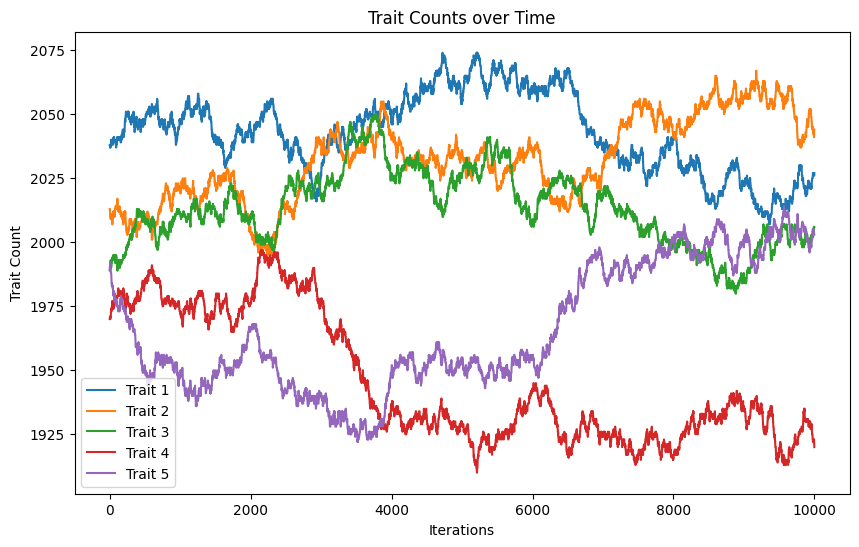

In [189]:
import numpy as np
import matplotlib.pyplot as plt

def abm_unbiased_transmission(num_agents, num_traits, num_iterations):
    # Initialize agents with random traits
    agents = np.random.randint(num_traits, size=num_agents)

    # Track the count of each trait over time
    trait_counts = []

    for _ in range(num_iterations):
        # Count the frequency of each trait
        counts = np.bincount(agents, minlength=num_traits)

        # Update trait_counts list
        trait_counts.append(counts.copy())

        # Randomly select two agents
        agent1, agent2 = np.random.choice(num_agents, size=2, replace=False)

        # Perform unbiased transmission by copying traits
        agents[agent2] = agents[agent1]

    # Convert trait_counts to a numpy array
    trait_counts = np.array(trait_counts)

    return trait_counts

# Set the parameters
num_agents = 10000
num_traits = 5
num_iterations = 10000

# Run the ABM
results = abm_unbiased_transmission(num_agents, num_traits, num_iterations)

# Plot the trait counts over time
plt.figure(figsize=(10, 6))
for trait in range(num_traits):
    plt.plot(results[:, trait], label=f'Trait {trait+1}')

plt.xlabel('Iterations')
plt.ylabel('Trait Count')
plt.title('Trait Counts over Time')
plt.legend()
plt.show()


In [ ]:
# cultural evolution
# 

# BIASED TRANSMISSION

# Set the parameters
num_agents = 10
num_traits = 5
num_iterations = 10

# Initialize agents with random traits
agents = np.random.randint(num_traits, size=num_agents)

# Track the count of each trait over time
trait_counts = []

for _ in range(num_iterations):
    # Count the frequency of each trait
    counts = np.bincount(agents, minlength=num_traits)

    # Update trait_counts list
    trait_counts.append(counts.copy())

    # Randomly select two agents
    agent1, agent2 = np.random.choice(num_agents, size=2, replace=False)

    # Perform unbiased transmission by copying traits
    agents[agent2] = agents[agent1]

# Convert trait_counts to a numpy array
trait_counts = np.array(trait_counts)

# Plot the trait counts over time
plt.figure(figsize=(10, 6))
for trait in range(num_traits):
    plt.plot(trait_counts[:, trait], label=f'Trait {trait+1}')

plt.xlabel('Iterations')
plt.ylabel('Trait Count')
plt.title('Trait Counts over Time')
plt.legend()
plt.show()

In [ ]:
# Biased Mutation
# Why we should

In [195]:

N = 60       # Grid will be N x N
SIM_T = 0.4  # Similarity threshold (that is 1-τ)
EMPTY = 0.1  # Fraction of vacant properties
B_to_R = 1   # Ratio of blue to red people

In [196]:
import numpy as np

def rand_init(N, B_to_R, EMPTY):
    """ Random system initialisation.
    BLUE  =  0
    RED   =  1
    EMPTY = -1
    """
    vacant = int(N * N * EMPTY)
    population = N * N - vacant
    blues = int(population * 1 / (1 + 1/B_to_R))
    reds = population - blues
    M = np.zeros(N*N, dtype=np.int8)
    M[:reds] = 1
    M[-vacant:] = -1
    np.random.shuffle(M)
    return M.reshape(N,N)

In [197]:
KERNEL = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]], dtype=np.int8)

In [198]:
from scipy.signal import convolve2d

def evolve(M, boundary='wrap'):
    """
    Args:
        M (numpy.array): the matrix to be evolved
        boundary (str): Either wrap, fill, or symm
    If the similarity ratio of neighbours
    to the entire neighborhood population
    is lower than the SIM_T,
    then the individual moves to an empty house.
    """
    kws = dict(mode='same', boundary=boundary)
    b_neighs = convolve2d(M == 0, KERNEL, **kws)
    r_neighs = convolve2d(M == 1, KERNEL, **kws)
    neighs   = convolve2d(M != -1,  KERNEL, **kws)

    b_dissatified = (b_neighs / neighs < SIM_T) & (M == 0)
    r_dissatified = (r_neighs / neighs < SIM_T) & (M == 1)
    M[r_dissatified | b_dissatified] = - 1
    vacant = (M == -1).sum()

    n_b_dissatified, n_r_dissatified = b_dissatified.sum(), r_dissatified.sum()
    filling = -np.ones(vacant, dtype=np.int8)
    filling[:n_b_dissatified] = 0
    filling[n_b_dissatified:n_b_dissatified + n_r_dissatified] = 1
    np.random.shuffle(filling)
    M[M==-1] = filling

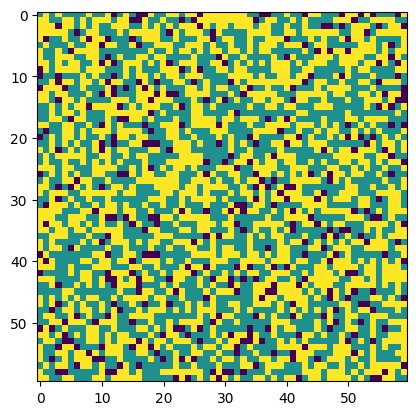

In [202]:
plt.imshow(rand_init(N, B_to_R, EMPTY))

In [210]:
evolve(M, boundary='wrap')

In [204]:
M = rand_init(N, B_to_R, EMPTY)

In [209]:
M2

In [ ]:
# SIR model